In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")
sns.set_context('talk')
sns.set_style('white')

%matplotlib inline



## Details of the Dataset
The dataset contains a mix of categorical and numeric type data.

A)Categorical Attributes

1)workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

2)education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

3)Individual’s highest education degree

4)marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

5)occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspect, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

6)Individual’s occupation

7)relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

8)Individual’s relation in a family

9)race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10)Race of Individual

11)sex: Female, Male.

12)native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad Tobago, Peru, Hong, Holland-Netherlands.

13)Individual’s native country


B)Continuous Attributes

1)age: continuous. Age of an individual

2)fnlwgt: final weight, continuous.
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
3)capital-gain: continuous.

4)capital-loss: continuous.

5)hours-per-week: continuous.

6)Individual’s working hour per week

## Exploring the Data

In [84]:
data = pd.read_csv('adult.csv')

In [85]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [86]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [87]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [88]:
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [90]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df = data.copy()

In [92]:
total_records = data['income'].count()
n_greater_50k = len(data[(data.income == '>50K')])
n_at_most_50k = len(data[(data.income == '<=50K')])
greater_percent = (n_greater_50k / total_records) * 100

print("Total number of records: {}".format(total_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 48842
Individuals making more than $50,000: 11687
Individuals making at most $50,000: 37155
Percentage of individuals making more than $50,000: 23.928176569346054%


Text(0.5, 1.0, 'Total Income Distribution')

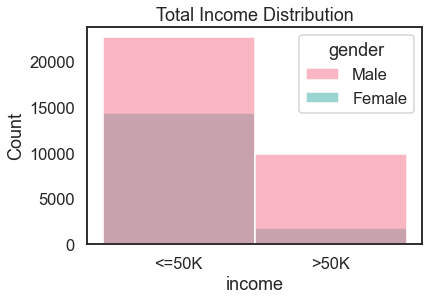

In [65]:
sns.histplot(data=data, x='income',hue='gender',palette='husl')
plt.title('Total Income Distribution')

In [126]:
# Drop fnlwgt because it's unique
df.drop('fnlwgt',axis=1,inplace=True)

In [127]:
# Dealing with the ‘?’by replacing it with the ‘MODE’.
df['workclass'] = df['workclass'].replace('?','Private')
df['occupation'] = df['occupation'].replace('?','Prof-specialty')
df['native-country'] = df['native-country'].replace('?','United-States')

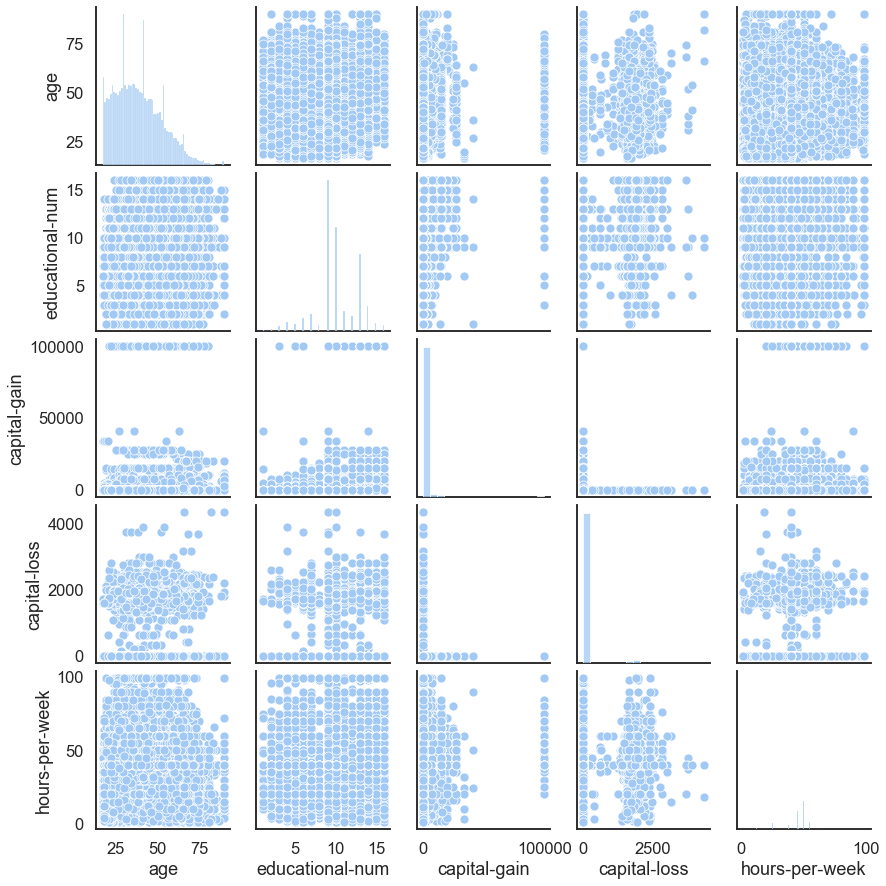

In [68]:
sns.pairplot(df)

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

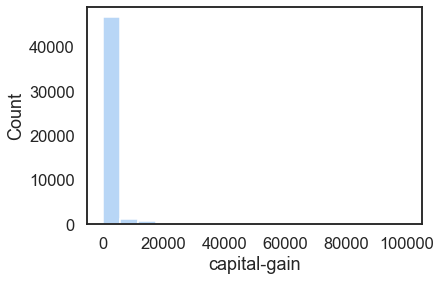

In [69]:
sns.histplot(data['capital-gain'])

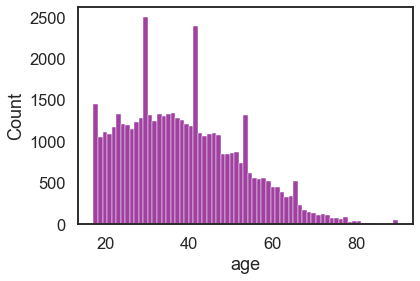

In [70]:
ax = sns.histplot(df['age'],kde=False,color='purple')
#plt.title('Age')

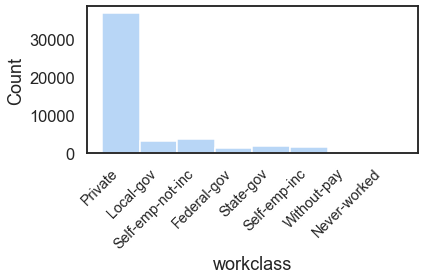

In [71]:
ax=sns.histplot(data=df,x='workclass')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
#plt.figure(figsize=(10,10))
plt.tight_layout()

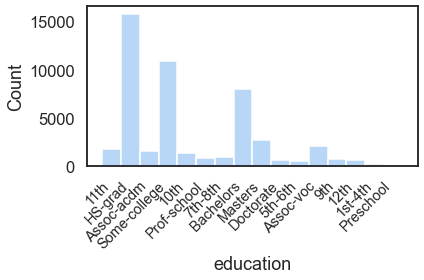

In [72]:
sns.histplot(data=df,x='education')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.tight_layout()

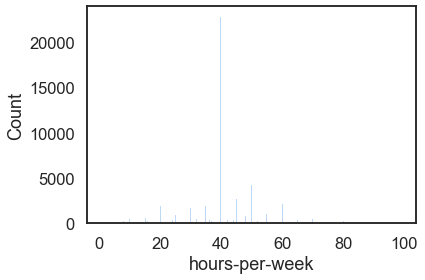

In [73]:
sns.histplot(data=df, x= 'hours-per-week')
plt.tight_layout()

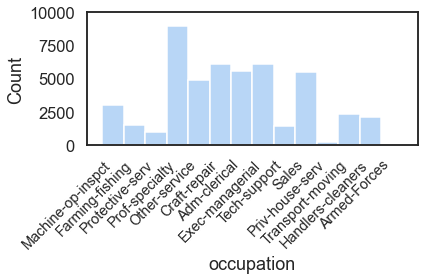

In [131]:
sns.histplot(data=df,x='occupation')
plt.ylim(0,10000)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
   fontsize='x-large'  
)

plt.tight_layout()

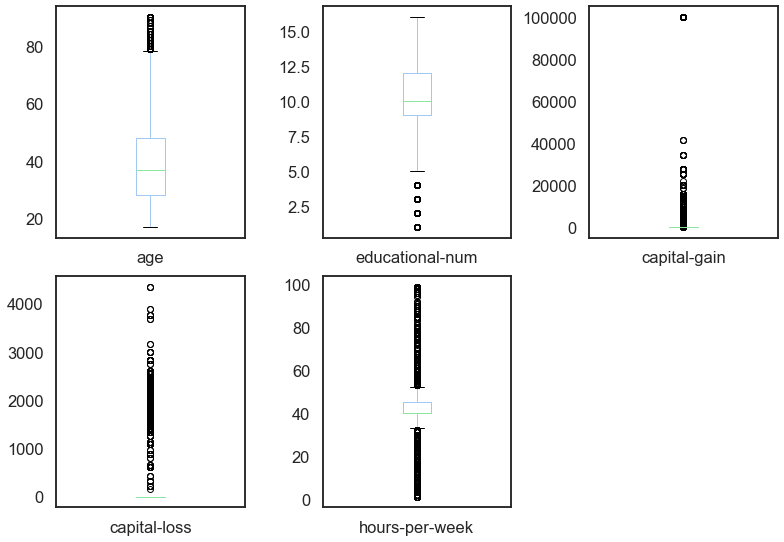

In [75]:
df.plot(kind='box',figsize=(11,11),layout=(3,3),sharex=False,subplots=True);
plt.tight_layout()

<AxesSubplot:>

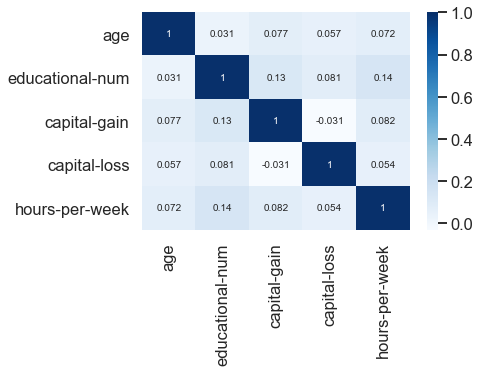

In [77]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

## Key Findings
The minimum age is 17 and the maximum is 90 years, most of the working age group lies between 20-40

The minimum hours-per-week is 1 and maximum is 90, with most of the count lying between 30-40

outliers observed in almost all the numeric features, these are the extreme values that are present in the data.

Not very strong correlation observed among variables

## Feature Scaling

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
workclass = le.fit_transform(df['workclass'])
sex = le.fit_transform(df['gender'])
edu = le.fit_transform(df['education'])
occu = le.fit_transform(df['occupation'])
race = le.fit_transform(df['race'])
native_country = le.fit_transform(df['native-country'])
marital_status = le.fit_transform(df['marital-status'])
relationship = le.fit_transform(df['relationship'])
income = le.fit_transform(df['income'])

In [94]:
df.drop(['workclass','education','occupation','race','gender','native-country','marital-status','relationship','income'], inplace=True, axis=1)

In [95]:
df['workclass'] = workclass
df['gender'] = sex
df['education'] = edu
df['occupation'] = occu
df['race'] = race
df['native-country'] = native_country
df['marital_-status'] = marital_status
df['relationship'] = relationship
df['income'] = income
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,gender,education,occupation,race,native-country,marital_-status,relationship,income
0,25,226802,7,0,0,40,4,1,1,7,2,39,4,3,0
1,38,89814,9,0,0,50,4,1,11,5,4,39,2,0,0
2,28,336951,12,0,0,40,2,1,7,11,4,39,2,0,1
3,44,160323,10,7688,0,40,4,1,15,7,2,39,2,0,1
4,18,103497,10,0,0,30,0,0,15,0,4,39,4,3,0


In [96]:

from sklearn.preprocessing import StandardScaler
df[['age','educational-num','capital-gain','capital-loss','hours-per-week']] = StandardScaler().fit_transform(df[['age','educational-num','capital-gain','capital-loss','hours-per-week']])

## Training the Model and Making Predictions

In [97]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

print(x.shape)
print(y.shape)


(48842, 14)
(48842,)


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)
prediction1 = reg.predict(x_test)
print('Accuracy on test set:{:.2f}'.format(accuracy_score(y_test,prediction1)))

Accuracy on test set:0.77


In [109]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model2 = dtc.fit(x_train,y_train)
prediction2=model2.predict(x_test)
print('Accuracy on test set:{:.2f}'.format(accuracy_score(y_test,prediction2)))

Accuracy on test set:0.82


In [114]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model3=rfc.fit(x_train,y_train)
prediction3 = model3.predict(x_test)

print('Accuracy on test set:{:.2f}'.format(rfc.score(x_test,y_test)))

Accuracy on test set:0.86


In [115]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [116]:
cm = confusion_matrix(y_test,prediction3)
cm

array([[6956,  523],
       [ 822, 1468]], dtype=int64)

In [118]:
TP= cm[0][0]
FP=cm[1][0]
TN = cm[1][1]
FN = cm[0][1]
print('Precision:',TP/(TP+TN))

print('Recall:',TP/(TP+FN))

Precision: 0.825735992402659
Recall: 0.9300708650889157


In [119]:
# for the other class 1 (>50)
print('Precision:', TN/(FN+TN) )
print('Recall:', TN/(TN+FP))

Precision: 0.7373179306880965
Recall: 0.6410480349344978


## Key Findings
Random Forest Classifier is giving the best accuracy on test data: 86%

Logistic Regression Classifier accuracy is: 77%

Decision Tree Classifier accuracy is: 82%

Tried to explain Confusion Matrix along with mentioning the formula and how it can be calculated for both the classes.

Further Scope:
Apply Boosting Algorithms, can go parameter tuning to improve the performance of the test results